In [117]:
import sys
print(sys.executable)

/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/bin/python


In [135]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import torch

In [168]:
df = pd.read_csv("../data_daily.csv")

In [169]:
df['day_number'] = np.arange(len(df))
df['month'] = df['# Date'].str[5:7]
df['day'] = df['# Date'].str[8:]
df['lag_1'] = df['Receipt_Count'].shift(1)
df['lag_2'] = df['Receipt_Count'].shift(2)  
df = df.dropna() 
df

,# Date,Receipt_Count,day_number,month,day,lag_1,lag_2
2,2021-01-03,7095414,2,01,03,7455524.0,7564766.0
3,2021-01-04,7666163,3,01,04,7095414.0,7455524.0
4,2021-01-05,7771289,4,01,05,7666163.0,7095414.0
5,2021-01-06,7473320,5,01,06,7771289.0,7666163.0
6,2021-01-07,7832624,6,01,07,7473320.0,7771289.0
...,...,...,...,...,...,...,...
360,2021-12-27,10350408,360,12,27,10738865.0,10045897.0
361,2021-12-28,10219445,361,12,28,10350408.0,10738865.0
362,2021-12-29,10313337,362,12,29,10219445.0,10350408.0
363,2021-12-30,10310644,363,12,30,10313337.0,10219445.0


In [170]:
X = df[['day_number', 'day', 'month', 'lag_1', 'lag_2']]
y = df['Receipt_Count']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [173]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rse = np.sqrt(mse)
print(rse)

Mean Squared Error: 49792927303.19241
223143.28872541164


In [124]:
p, d, q = 1, 1, 1

/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [125]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [126]:
mse = mean_squared_error(test['Receipt_Count'], predictions)
rmse = math.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 181315641864.08908
RMSE: 425811.7446291132


In [127]:
df.set_index('# Date', inplace=True)
df.sort_index(inplace=True)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
model = ExponentialSmoothing(train['Receipt_Count'], trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [128]:

predictions = results.forecast(steps=len(test))
mse = mean_squared_error(test['Receipt_Count'], predictions)
rmse = math.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

NameError: name 'sqrt' is not defined

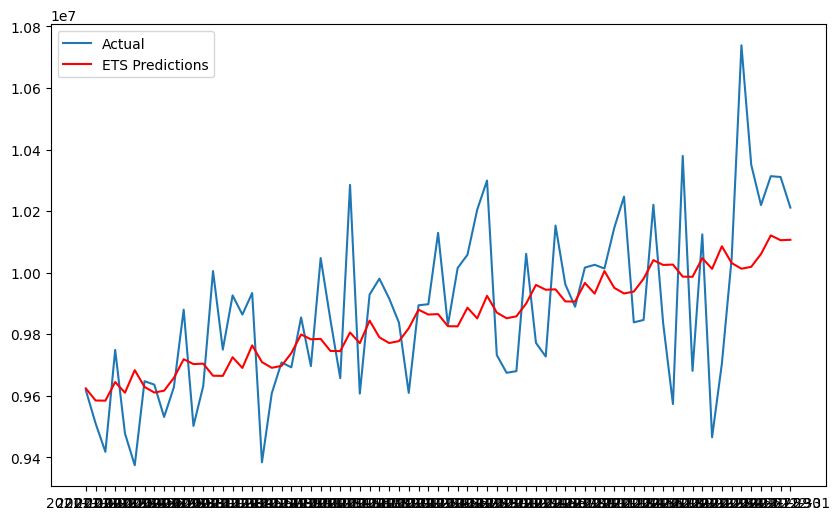

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(test['Receipt_Count'], label='Actual')
plt.plot(test.index, predictions, label='ETS Predictions', color='red')
plt.legend(loc='upper left')
plt.show()

In [178]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
 
df = pd.read_csv('../data_daily.csv')
timeseries = df[["Receipt_Count"]].div(1000).values.astype('float32')
 
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)
 
lookback = 12
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
 
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=150, num_layers=2, batch_first=True, dropout=0.2)
        self.linear = nn.Linear(150, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x
 
model = AirModel()
optimizer = optim.Adam(model.parameters(), lr = .02)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=14)
 
n_epochs = 8100
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
 
with torch.no_grad():
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

Epoch 0: train RMSE 8373.2480, test RMSE 9664.1934
Epoch 100: train RMSE 4542.5029, test RMSE 5821.8784
Epoch 200: train RMSE 1819.6683, test RMSE 3039.8335
Epoch 300: train RMSE 785.0469, test RMSE 1687.8436
Epoch 400: train RMSE 748.3015, test RMSE 1474.2841
Epoch 500: train RMSE 747.1734, test RMSE 1471.7083
Epoch 600: train RMSE 734.7318, test RMSE 1468.8065
Epoch 700: train RMSE 721.8693, test RMSE 1462.7010
Epoch 800: train RMSE 709.7812, test RMSE 1453.6011
Epoch 900: train RMSE 698.2552, test RMSE 1448.7413


KeyboardInterrupt: 